<a href="https://colab.research.google.com/github/astrrr/Image-Processing-Lab/blob/main/Activity8_imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [687]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial
import numpy as np
import math

# 8.1  Prepare features for Main image / Tile images

In [688]:
#Load main image
main_image = cv2.imread('/content/drive/MyDrive/img_processing_lab8_data/Background/pexels-全-记录-4330697.jpg')
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
#main_image = cv2.resize(main_image,(1250,1250))

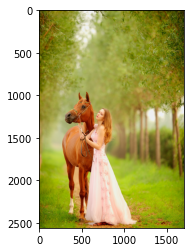

In [689]:
plt.imshow(main_image)
plt.show()

In [690]:
print(main_image.shape)

(2559, 1703, 3)


In [691]:
#Define tile size
height = 50
width = 50
tile_size = (width, height)


In [692]:
main_image[12:13].mean(axis=(0,1))

array([126.23899002, 127.15149736,  48.51556078])

In [693]:
main_image_feature = np.empty_like(main_image)
# Create main image feature grid of subimage
# Calculate average (mean) color of each subimage with tile_size


for i in range((main_image.shape[0])):
  for j in range((main_image.shape[1])):  
         
        
        #print(main_image[i][j][0])
        main_image_feature[i][j] = main_image[i*tile_size[0]:(i+1)*tile_size[0], j*tile_size[1]:(j+1)*tile_size[1]].mean(axis=(0,1))
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


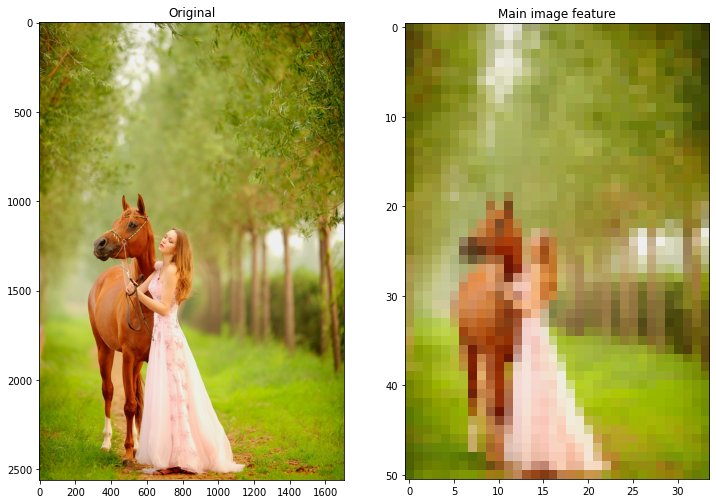

In [694]:
# Cropping an image
h = math.floor((main_image.shape[0])/height)
w = math.floor((main_image.shape[1])/width)
cropped_image = main_image_feature[0:h, 0:w]

 
# Display cropped image
fig = plt.figure(figsize=(12,12))

fig.add_subplot(121)
plt.title('Original')
plt.imshow(main_image)

fig.add_subplot(122)
plt.title('Main image feature')
plt.imshow(cropped_image)
plt.show()

* 8.1.2 PREPARE TILE IMAGES AND FEATURES

In [695]:
# Collect filenames of all tile images
All_files = glob.glob('/content/drive/MyDrive/img_processing_lab8_data/Background/*')

In [696]:
# Load tile images and resize to tile_size
tiles = []
for img in All_files:
  #tile = image.load_img(img, target_size=(200,200))
  tile = cv2.imread(img)
  tile = cv2.resize(tile, (height,width))
  tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
  tiles.append(tile)

In [697]:
# Create array of average (mean) color of each tile image
Tile_features = []
for tile in tiles:
  mean_color = np.array(tile).mean(axis=(0,1))
  Tile_features.append(mean_color)

In [698]:
Tile_features[1]

array([110.4176, 117.9892,  87.742 ])

# 8.2 Image Clustering and Matching using KNN with KDTree Algorithm

In [699]:
#Create KDTree of tile color features
tree = spatial.KDTree(Tile_features)

In [702]:
#KNN (k=1) search for best matched tiles with each subimage
closest_tiles = np.zeros((height, width), dtype=np.uint32)
for i in range(height):
  for j in range(width):
    closest = tree.query(main_image_feature [i,j])
    #print(closest)
    closest_tiles[i, j] = closest[1]

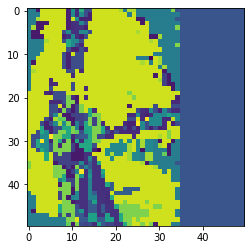

In [706]:
#cropped_closest_tiles = closest_tiles[0:h, 0:w]
cropped_closest_tiles = closest_tiles[0:h, 0:w]
plt.imshow(closest_tiles)

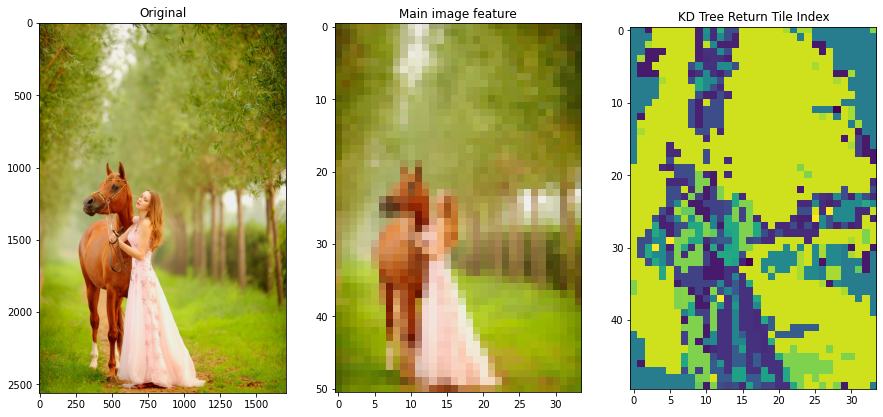

In [707]:
fig2 = plt.figure(figsize=(15,15))

fig2.add_subplot(131)
plt.title('Original')
plt.imshow(main_image)

fig2.add_subplot(132)
plt.title('Main image feature')
plt.imshow(cropped_image)

fig2.add_subplot(133)
plt.title('KD Tree Return Tile Index')
plt.imshow(cropped_closest_tiles)

plt.show()

# 8.3 CREATE IMAGE MOSAIC

In [713]:
output = np.array(main_image)
print(output.shape)
cropped_closest_tiles = np.expand_dims(cropped_closest_tiles,axis=0)

(2559, 1703, 3)


In [715]:
# Create an output image
output = np.array(main_image)
for i in range(height):
  for j in range(width):
    # Offset of tile
    x, y = i*tile_size[0], j*tile_size[1]
    # Index of tile
    index = closest_tiles[i, j]
    # Draw tile
    print('x     : ', x)
    print('x_til : ', (x+tile_size[0]))
    print('y     : ', y)
    print('y_til : ', (y+tile_size[1]))
    output[x:(x+tile_size[0]), y:(y+tile_size[1]), :] = tiles[index]

x     :  0
x_til :  50
y     :  0
y_til :  50
x     :  0
x_til :  50
y     :  50
y_til :  100
x     :  0
x_til :  50
y     :  100
y_til :  150
x     :  0
x_til :  50
y     :  150
y_til :  200
x     :  0
x_til :  50
y     :  200
y_til :  250
x     :  0
x_til :  50
y     :  250
y_til :  300
x     :  0
x_til :  50
y     :  300
y_til :  350
x     :  0
x_til :  50
y     :  350
y_til :  400
x     :  0
x_til :  50
y     :  400
y_til :  450
x     :  0
x_til :  50
y     :  450
y_til :  500
x     :  0
x_til :  50
y     :  500
y_til :  550
x     :  0
x_til :  50
y     :  550
y_til :  600
x     :  0
x_til :  50
y     :  600
y_til :  650
x     :  0
x_til :  50
y     :  650
y_til :  700
x     :  0
x_til :  50
y     :  700
y_til :  750
x     :  0
x_til :  50
y     :  750
y_til :  800
x     :  0
x_til :  50
y     :  800
y_til :  850
x     :  0
x_til :  50
y     :  850
y_til :  900
x     :  0
x_til :  50
y     :  900
y_til :  950
x     :  0
x_til :  50
y     :  950
y_til :  1000
x     :  0
x_til :  50


ValueError: ignored

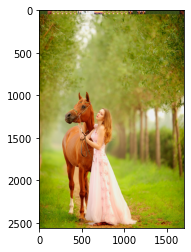

In [711]:
plt.imshow(output)

In [716]:
# # Fill each subimage with matched tile

# main_photo = np.empty_like(main_image)

# for i in range(main_image_feature.shape[0]):
#   for j in range(main_image_feature.shape[1]):
#     # Offset of tile
#     x, y = i*tile_size[0], j*tile_size[1]
#     # Index of tile
#     index = cropped_closest_tiles[j, i]
    
#     #print(index[2])
#     r = index[0]
#     g = index[1]
#     b = index[2]
#     #print('x : ',x+tile_size[0])
#     #print('y : ',y+tile_size[1])

#     till_x = x+tile_size[0]
#     till_y = y+tile_size[1]
#     #print(tiles[index])
#     main_photo[x: till_x, y: till_y, :] = tiles[index[0]]